In [426]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_zip = pd.read_csv('combine_zip.csv')

print(df_zip.head(5))

    ZIP  MEDIAN_HOUSEHOLD_INCOME  POPULATION  POPULATION_DENSITY_PER_SQ_MILE  \
0  1001                    56663       16769                     1465.565461   
1  1002                    49853       29049                      527.751031   
2  1003                    28462       10372                    14587.904360   
3  1005                    75423        5079                      114.800416   
4  1007                    79076       14649                      278.270615   

   HYDROCODONE  OXYCODONE  
0       5737.5    64422.5  
1       2517.5    28040.0  
2          0.0        0.0  
3       4307.5    45322.5  
4       4782.5    47247.5  


In [427]:
df_zip['HYDROCODONE_PER_CAPITA'] = df_zip['HYDROCODONE'] / df_zip['POPULATION']
df_zip['OXYCODONE_PER_CAPITA'] = df_zip['OXYCODONE'] / df_zip['POPULATION']
print(df_zip.head())

    ZIP  MEDIAN_HOUSEHOLD_INCOME  POPULATION  POPULATION_DENSITY_PER_SQ_MILE  \
0  1001                    56663       16769                     1465.565461   
1  1002                    49853       29049                      527.751031   
2  1003                    28462       10372                    14587.904360   
3  1005                    75423        5079                      114.800416   
4  1007                    79076       14649                      278.270615   

   HYDROCODONE  OXYCODONE  HYDROCODONE_PER_CAPITA  OXYCODONE_PER_CAPITA  
0       5737.5    64422.5                0.342149              3.841762  
1       2517.5    28040.0                0.086664              0.965266  
2          0.0        0.0                0.000000              0.000000  
3       4307.5    45322.5                0.848100              8.923509  
4       4782.5    47247.5                0.326473              3.225305  


In [428]:
#dropping zip codes with a population below 1000 to remove insignificant outliers
drop_index = df_zip[df_zip['POPULATION'] <= 500].index
df_zip.drop(drop_index, inplace = True)


In [429]:
df_zip['POPULATION'].min()

501

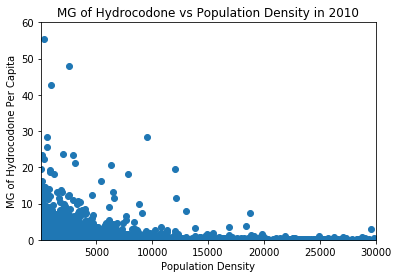

In [455]:
plt.ylim(0, 60)
plt.xlim(20,30000)
plt.xlabel('Population Density')
plt.ylabel('MG of Hydrocodone Per Capita')
plt.title('MG of Hydrocodone vs Population Density in 2010')
plt.scatter(df_zip['POPULATION_DENSITY_PER_SQ_MILE'],df_zip['HYDROCODONE_PER_CAPITA'])
plt.show()

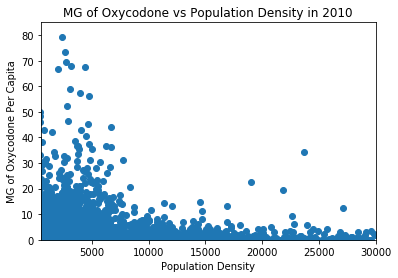

In [451]:
plt.ylim(0, 85)
plt.xlim(500,30000)
plt.xlabel('Population Density')
plt.ylabel('MG of Oxycodone Per Capita')
plt.title('MG of Oxycodone vs Population Density in 2010')
plt.scatter(df_zip['POPULATION_DENSITY_PER_SQ_MILE'],df_zip['OXYCODONE_PER_CAPITA'])

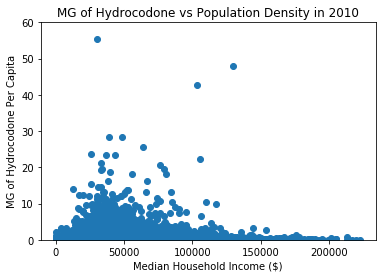

In [456]:
plt.ylim(0, 60)
plt.xlabel('Median Household Income ($)')
plt.ylabel('MG of Hydrocodone Per Capita')
plt.title('MG of Hydrocodone vs Population Density in 2010')
plt.scatter(df_zip['MEDIAN_HOUSEHOLD_INCOME'],df_zip['HYDROCODONE_PER_CAPITA'])

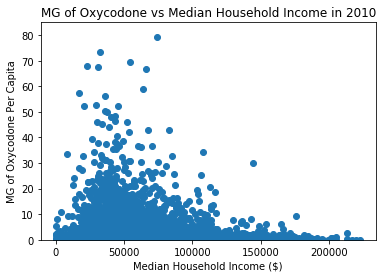

In [433]:
plt.ylim(0, 85)
plt.xlabel('Median Household Income ($)')
plt.ylabel('MG of Oxycodone Per Capita')
plt.title('MG of Oxycodone vs Median Household Income in 2010')
plt.scatter(df_zip['MEDIAN_HOUSEHOLD_INCOME'],df_zip['OXYCODONE_PER_CAPITA'])

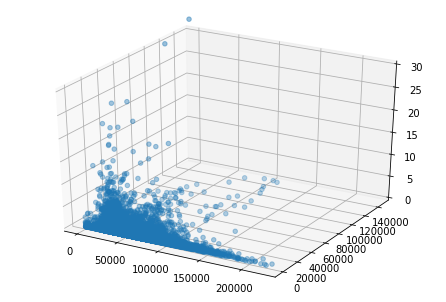

In [458]:
ax = Axes3D(plt.figure())
ax.set_zlim(0, 30)
ax.scatter3D(df_zip['MEDIAN_HOUSEHOLD_INCOME'], df_zip['POPULATION_DENSITY_PER_SQ_MILE'], df_zip['HYDROCODONE_PER_CAPITA'])

In [466]:
binned_income = [0, 1000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 115000, 250000]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
df_zip['MEDIAN_HOUSEHOLD_INCOME_BIN'] = pd.cut(df_zip['MEDIAN_HOUSEHOLD_INCOME'], binned_income, labels = labels)
#print(df_zip.head(3))

In [467]:
df_binned_income = {
    'INCOME_BIN_RANGE':['$0-1,000', '$1001-10,000', '$10,001-20,000', '$20,001-30,000', '$30,001-40,000', '$40,001-50,000', '$50,001-60,000', '$60,001-70,000', '$70,001-80,000', '$80,001-90,000', '$90,001-100,000', '$100,001-115,000','$115,001-250,000'],            
    'MEDIAN_HOUSEHOLD_INCOME_BIN':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
                }
df_binned_income = pd.DataFrame(df_binned_income, columns = ['MEDIAN_HOUSEHOLD_INCOME_BIN', 'INCOME_BIN_RANGE', 'BIN_ZIP_COUNT', 'TOTAL_BIN_HYDROCODONE', 'TOTAL_BIN_OXYCODONE', 'AVG_BIN_HYDROCODONE_PER_ZIP', 'AVG_BIN_OXYCODONE_PER_ZIP'])
#print(df_binned_income.head())

In [468]:
df1 = df_zip['MEDIAN_HOUSEHOLD_INCOME_BIN'].value_counts().reset_index()
df1 = df1.sort_values(by='index').reset_index(drop=True).drop(columns=['index'])
df_binned_income['BIN_ZIP_COUNT'] = df1['MEDIAN_HOUSEHOLD_INCOME_BIN']
#print(df_binned_income)

In [469]:
#df_zip.loc[df_zip['HYDROCODONE_PER_CAPITA'] == df_zip['HYDROCODONE_PER_CAPITA'].max()]

In [471]:
df_binned_income['TOTAL_BIN_HYDROCODONE'] = df_zip.groupby(['MEDIAN_HOUSEHOLD_INCOME_BIN'])['HYDROCODONE_PER_CAPITA'].sum()
df_binned_income['TOTAL_BIN_OXYCODONE'] = df_zip.groupby(['MEDIAN_HOUSEHOLD_INCOME_BIN'])['OXYCODONE_PER_CAPITA'].sum()
#print(df_binned_income)

In [472]:
df_binned_income['AVG_BIN_HYDROCODONE_PER_ZIP'] = df_binned_income['TOTAL_BIN_HYDROCODONE'] / df_binned_income['BIN_ZIP_COUNT']
df_binned_income['AVG_BIN_OXYCODONE_PER_ZIP'] = df_binned_income['TOTAL_BIN_OXYCODONE'] / df_binned_income['BIN_ZIP_COUNT']
print(df_binned_income)

    MEDIAN_HOUSEHOLD_INCOME_BIN  INCOME_BIN_RANGE  BIN_ZIP_COUNT  \
0                             1          $0-1,000             25   
1                             2      $1001-10,000            105   
2                             3    $10,001-20,000            258   
3                             4    $20,001-30,000           1581   
4                             5    $30,001-40,000           5597   
5                             6    $40,001-50,000           7437   
6                             7    $50,001-60,000           4784   
7                             8    $60,001-70,000           2674   
8                             9    $70,001-80,000           1552   
9                            10    $80,001-90,000            958   
10                           11   $90,001-100,000            551   
11                           12  $100,001-115,000            500   
12                           13  $115,001-250,000            437   

    TOTAL_BIN_HYDROCODONE  TOTAL_BIN_OXYCODONE 

In [473]:
drop_index1 = df_binned_income[df_binned_income['MEDIAN_HOUSEHOLD_INCOME_BIN'] == 1].index
df_binned_income.drop(drop_index1, inplace = False)

,MEDIAN_HOUSEHOLD_INCOME_BIN,INCOME_BIN_RANGE,BIN_ZIP_COUNT,TOTAL_BIN_HYDROCODONE,TOTAL_BIN_OXYCODONE,AVG_BIN_HYDROCODONE_PER_ZIP,AVG_BIN_OXYCODONE_PER_ZIP
1,2,"$1001-10,000",105,6.692715,19.264421,0.063740,0.183471
2,3,"$10,001-20,000",258,30.478147,92.278753,0.118132,0.357670
3,4,"$20,001-30,000",1581,213.148518,466.649033,0.134819,0.295161
4,5,"$30,001-40,000",5597,1578.939456,2433.302038,0.282105,0.434751
5,6,"$40,001-50,000",7437,4851.658976,8444.732130,0.652368,1.135503
6,7,"$50,001-60,000",4784,4602.999938,9127.920574,0.962166,1.908010
7,8,"$60,001-70,000",2674,2323.283255,5624.743075,0.868842,2.103494
8,9,"$70,001-80,000",1552,1341.685530,3665.832592,0.864488,2.362006
9,10,"$80,001-90,000",958,846.291033,2509.889550,0.883394,2.619926
10,11,"$90,001-100,000",551,487.885947,1519.238990,0.885455,2.757240


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024654704438>,
      dtype=object)

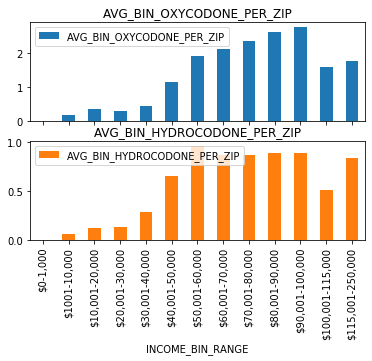

In [474]:
df_binned_income.plot.bar(x = 'INCOME_BIN_RANGE', y = {'AVG_BIN_HYDROCODONE_PER_ZIP', 'AVG_BIN_OXYCODONE_PER_ZIP'}, subplots = True)

In [486]:
binned_pop_dens = [0, 1, 7, 250, 500, 1000, 2500, 5000, 10000, 15000, 20000, 30000]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
df_zip['POPULATION_DENSITY_BIN'] = pd.cut(df_zip['POPULATION_DENSITY_PER_SQ_MILE'], binned_pop_dens, labels = labels)
df_zip.head(3)

,ZIP,MEDIAN_HOUSEHOLD_INCOME,POPULATION,POPULATION_DENSITY_PER_SQ_MILE,HYDROCODONE,OXYCODONE,HYDROCODONE_PER_CAPITA,OXYCODONE_PER_CAPITA,MEDIAN_HOUSEHOLD_INCOME_BIN,POPULATION_DENSITY_BIN
0,1001,56663,16769,1465.565461,5737.5,64422.5,0.342149,3.841762,7,6
1,1002,49853,29049,527.751031,2517.5,28040.0,0.086664,0.965266,6,5
2,1003,28462,10372,14587.904360,0.0,0.0,0.000000,0.000000,4,9


In [488]:
df_binned_pop_dens = {
    'POP_DENS_BIN_RANGE':['0-1', '2-7',  '8-250', '251-500', '501-1000', '1001-2500', '2501-5000', '5001-10000', '10001-15000', '15001-20000', '20001-30000'],            
    'POPULATION_DENSITY_BIN':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
                }
df_binned_pop_dens = pd.DataFrame(df_binned_pop_dens, columns = ['POPULATION_DENSITY_BIN', 'POP_DENS_BIN_RANGE', 'BIN_ZIP_COUNT', 'TOTAL_BIN_HYDROCODONE', 'TOTAL_BIN_OXYCODONE', 'AVG_BIN_HYDROCODONE_PER_ZIP', 'AVG_BIN_OXYCODONE_PER_ZIP'])
print(df_binned_pop_dens.head(3))

   POPULATION_DENSITY_BIN POP_DENS_BIN_RANGE BIN_ZIP_COUNT  \
0                       1                0-1           NaN   
1                       2                2-7           NaN   
2                       3              8-250           NaN   

  TOTAL_BIN_HYDROCODONE TOTAL_BIN_OXYCODONE AVG_BIN_HYDROCODONE_PER_ZIP  \
0                   NaN                 NaN                         NaN   
1                   NaN                 NaN                         NaN   
2                   NaN                 NaN                         NaN   

  AVG_BIN_OXYCODONE_PER_ZIP  
0                       NaN  
1                       NaN  
2                       NaN  


In [489]:
df2 = df_zip['POPULATION_DENSITY_BIN'].value_counts().reset_index()
df2 = df2.sort_values(by='index').reset_index(drop=True).drop(columns=['index'])
df_binned_pop_dens['BIN_ZIP_COUNT'] = df2['POPULATION_DENSITY_BIN']

In [491]:
print(df_binned_pop_dens.head(11))


    POPULATION_DENSITY_BIN POP_DENS_BIN_RANGE  BIN_ZIP_COUNT  \
0                        1                0-1             66   
1                        2                2-7           1230   
2                        3              8-250          15037   
3                        4            251-500           1915   
4                        5           501-1000           1737   
5                        6          1001-2500           2438   
6                        7          2501-5000           2214   
7                        8         5001-10000           1152   
8                        9        10001-15000            286   
9                       10        15001-20000            143   
10                      11        20001-30000            103   

   TOTAL_BIN_HYDROCODONE TOTAL_BIN_OXYCODONE AVG_BIN_HYDROCODONE_PER_ZIP  \
0                    NaN                 NaN                         NaN   
1                    NaN                 NaN                         NaN   
2  

In [494]:
df_binned_pop_dens['TOTAL_BIN_HYDROCODONE'] = df_zip.groupby(['POPULATION_DENSITY_BIN'])['HYDROCODONE_PER_CAPITA'].sum()
df_binned_pop_dens['TOTAL_BIN_OXYCODONE'] = df_zip.groupby(['POPULATION_DENSITY_BIN'])['OXYCODONE_PER_CAPITA'].sum()

df_binned_pop_dens['AVG_BIN_HYDROCODONE_PER_ZIP'] = df_binned_income['TOTAL_BIN_HYDROCODONE'] / df_binned_pop_dens['BIN_ZIP_COUNT']
df_binned_pop_dens['AVG_BIN_OXYCODONE_PER_ZIP'] = df_binned_income['TOTAL_BIN_OXYCODONE'] / df_binned_pop_dens['BIN_ZIP_COUNT']
print(df_binned_pop_dens.head(11))

    POPULATION_DENSITY_BIN POP_DENS_BIN_RANGE  BIN_ZIP_COUNT  \
0                        1                0-1             66   
1                        2                2-7           1230   
2                        3              8-250          15037   
3                        4            251-500           1915   
4                        5           501-1000           1737   
5                        6          1001-2500           2438   
6                        7          2501-5000           2214   
7                        8         5001-10000           1152   
8                        9        10001-15000            286   
9                       10        15001-20000            143   
10                      11        20001-30000            103   

    TOTAL_BIN_HYDROCODONE  TOTAL_BIN_OXYCODONE  AVG_BIN_HYDROCODONE_PER_ZIP  \
0                     NaN                  NaN                          NaN   
1                9.460732            11.468760                     0.0076

In [495]:
drop_index2 = df_binned_pop_dens[df_binned_pop_dens['POPULATION_DENSITY_BIN'] == 1].index
df_binned_pop_dens.drop(drop_index2, inplace = False)

,POPULATION_DENSITY_BIN,POP_DENS_BIN_RANGE,BIN_ZIP_COUNT,TOTAL_BIN_HYDROCODONE,TOTAL_BIN_OXYCODONE,AVG_BIN_HYDROCODONE_PER_ZIP,AVG_BIN_OXYCODONE_PER_ZIP
1,2,2-7,1230,9.460732,11.468760,0.007692,0.009324
2,3,8-250,15037,258.350747,431.433061,0.017181,0.028691
3,4,251-500,1915,7715.618759,12314.875867,4.029044,6.430745
4,5,501-1000,1737,1792.573156,3638.820284,1.031994,2.094888
5,6,1001-2500,2438,1754.466426,3662.771727,0.719633,1.502367
6,7,2501-5000,2214,2459.044894,5594.959569,1.110680,2.527082
7,8,5001-10000,1152,1998.507033,6569.382050,1.734815,5.702589
8,9,10001-15000,286,850.748658,2682.241728,2.974646,9.378468
9,10,15001-20000,143,137.963789,432.031328,0.964782,3.021198
10,11,20001-30000,103,50.192828,192.102568,0.487309,1.865073


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000246547E56A0>,
      dtype=object)

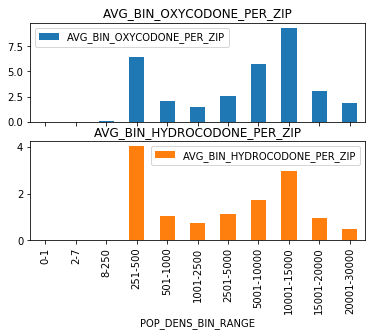

In [496]:
df_binned_pop_dens.plot.bar(x = 'POP_DENS_BIN_RANGE', y = {'AVG_BIN_HYDROCODONE_PER_ZIP', 'AVG_BIN_OXYCODONE_PER_ZIP'}, subplots = True)